In [1]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 20;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 20
cphl = CPHL.CPHLSolver(N_sites, g_vals);

In [2]:
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)
CPHL.OptimizeCPDMRG(cphl);

┌ Warning: Calling `inner(x::MPS, A::MPO, y::MPS)` where the site indices of the `MPS`
│ `x` and the `MPS` resulting from contracting `MPO` `A` with `MPS` `y` don't
│ match is deprecated as of ITensors v0.3 and will result in an error in ITensors
│ v0.4. The most common cause of this is something like the following:
│ 
│ ```julia
│ s = siteinds("S=1/2")
│ psi = random_mps(s)
│ H = MPO(s, "Id")
│ inner(psi, H, psi)
│ ```
│ 
│ `psi` has the Index structure `-s-(psi)` and `H` has the Index structure
│ `-s'-(H)-s-`, so the Index structure of would be `(dag(psi)-s- -s'-(H)-s-(psi)`
│  unless the prime levels were fixed. Previously we tried fixing the prime level
│   in situations like this, but we will no longer be doing that going forward.
│ 
│ There are a few ways to fix this. You can simply change:
│ 
│ ```julia
│ inner(psi, H, psi)
│ ```
│ 
│ to:
│ 
│ ```julia
│ inner(psi', H, psi)
│ ```
│ 
│ in which case the Index structure will be `(dag(psi)-s'-(H)-s-(psi)`.
│ 
│ Alternatively, you c

In [3]:
for i in 1:20
    CPHL.LearnHarmonics(cphl)

    @save "DATA/ALPHAMat_$(N_sites).jld2" ALPHAMat = copy(cphl.ALPHAMat)
    if cphl.flag_convergence
        println("Converged")
        break
    end
end

Current error = 0.04227714273522146; λ weight = 1.0; δ step = 0.35; max|C| = 0.01740978546003642
Current error = 0.052487212181549114; λ weight = 0.8333333333333334; δ step = 0.35; max|C| = 0.0403674816979723
Current error = 0.04887602134360061; λ weight = 0.7142857142857143; δ step = 0.2916666666666667; max|C| = 0.05869158409840271
Current error = 0.04606037956344763; λ weight = 0.625; δ step = 0.2916666666666667; max|C| = 0.07599677524726454
Current error = 0.04332287330700256; λ weight = 0.5555555555555556; δ step = 0.2916666666666667; max|C| = 0.09229633584752561
Current error = 0.04082741312241062; λ weight = 0.5; δ step = 0.2916666666666667; max|C| = 0.10768012579466145
Current error = 0.03839231603574402; λ weight = 0.45454545454545453; δ step = 0.2916666666666667; max|C| = 0.1221560336372582
Current error = 0.03633118378162495; λ weight = 0.41666666666666663; δ step = 0.2916666666666667; max|C| = 0.13585789667726553
Current error = 0.03409538322052504; λ weight = 0.384615384615

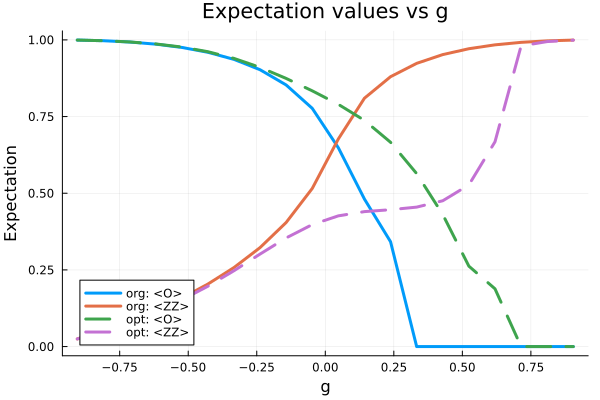

In [4]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

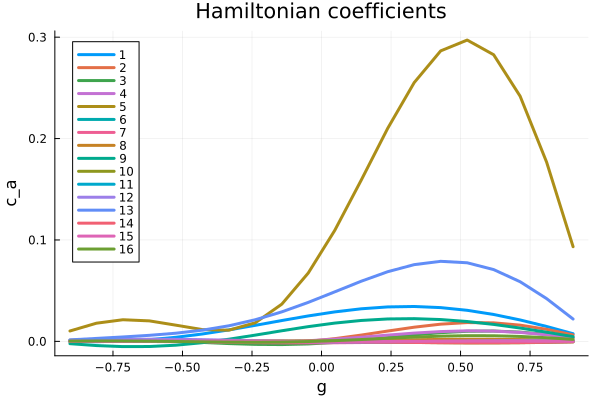

In [5]:
l = plot(cphl.g_vals, cphl.CMat[:, 1], label="$(1)", title="Hamiltonian coefficients", xlabel="g", ylabel="c_a", linewidth=3);
for idx in 2:cphl.N_op
    plot!(l, cphl.g_vals, cphl.CMat[:, idx], label="$(idx)", linewidth=3)
end

display(l)